In [1]:
# Table of Contents

# 01. Introductions
# 02. K-Means Clustering
# 03. DBSCAN Clustering
# 04. Hierarchical Clustering

In [2]:
# 01. Introductions
# Clustering is an unsupervised learning method which can be used to discover the underlying pattern in the data structure.  
# For example, it can be used to group unlabelled data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,Fully Paid,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0


ColumnName, DataType, MissingValues
Loan Status , object , False
Current Loan Amount , int64 , False
Term , object , False
Credit Score , float64 , False
Annual Income , float64 , False
Years in current job , object , True
Home Ownership , object , False
Purpose , object , False
Monthly Debt , float64 , False
Years of Credit History , float64 , False
Months since last delinquent , float64 , False
Number of Open Accounts , int64 , False
Number of Credit Problems , int64 , False
Current Credit Balance , int64 , False
Maximum Open Credit , float64 , False
Bankruptcies , float64 , False
Tax Liens , float64 , False


/var/folders/m0/f9ydkpw52fl7g1pqg646kctm0000gn/T/ipykernel_22711/3790411084.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('Years in current job',1)
/var/folders/m0/f9ydkpw52fl7g1pqg646kctm0000gn/T/ipykernel_22711/3790411084.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('Loan Status',1)
/var/folders/m0/f9ydkpw52fl7g1pqg646kctm0000gn/T/ipykernel_22711/3790411084.py:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop('Purpose',1)


,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412,Short Term,709.000000,1.167493e+06,Home Mortgage,5214.74,17.2,34.901321,6,1,228190,416746.0,1.0,0.0
1,262328,Short Term,1076.456089,1.378277e+06,Home Mortgage,33295.98,21.1,8.000000,35,0,229976,850784.0,0.0,0.0
2,99999999,Short Term,741.000000,2.231892e+06,Own Home,29200.53,14.9,29.000000,18,1,297996,750090.0,0.0,0.0
3,347666,Long Term,721.000000,8.069490e+05,Own Home,8741.90,12.0,34.901321,9,0,256329,386958.0,0.0,0.0
4,176220,Short Term,1076.456089,1.378277e+06,Rent,20639.70,6.1,34.901321,15,0,253460,427174.0,0.0,0.0
5,206602,Short Term,7290.000000,8.968570e+05,Home Mortgage,16367.74,17.3,34.901321,6,0,215308,272448.0,0.0,0.0
6,217646,Short Term,730.000000,1.184194e+06,Home Mortgage,10855.08,19.6,10.000000,13,1,122170,272052.0,1.0,0.0
7,648714,Long Term,1076.456089,1.378277e+06,Home Mortgage,14806.13,8.2,8.000000,15,0,193306,864204.0,0.0,0.0
8,548746,Short Term,678.000000,2.559110e+06,Rent,18660.28,22.6,33.000000,4,0,437171,555038.0,0.0,0.0
9,215952,Short Term,739.000000,1.454735e+06,Rent,39277.75,13.9,34.901321,20,0,669560,1021460.0,0.0,0.0


Column Datatypes:
 Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Home Ownership                   object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


'Data Example:'

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
0,445412,709.000000,1.167493e+06,5214.74,17.2,34.901321,6,1,228190,416746.0,1.0,0.0,0,1,0,0,0,1
1,262328,1076.456089,1.378277e+06,33295.98,21.1,8.000000,35,0,229976,850784.0,0.0,0.0,0,1,0,0,0,1
2,99999999,741.000000,2.231892e+06,29200.53,14.9,29.000000,18,1,297996,750090.0,0.0,0.0,0,0,1,0,0,1
3,347666,721.000000,8.069490e+05,8741.90,12.0,34.901321,9,0,256329,386958.0,0.0,0.0,0,0,1,0,1,0
4,176220,1076.456089,1.378277e+06,20639.70,6.1,34.901321,15,0,253460,427174.0,0.0,0.0,0,0,0,1,0,1
5,206602,7290.000000,8.968570e+05,16367.74,17.3,34.901321,6,0,215308,272448.0,0.0,0.0,0,1,0,0,0,1
6,217646,730.000000,1.184194e+06,10855.08,19.6,10.000000,13,1,122170,272052.0,1.0,0.0,0,1,0,0,0,1
7,648714,1076.456089,1.378277e+06,14806.13,8.2,8.000000,15,0,193306,864204.0,0.0,0.0,0,1,0,0,1,0
8,548746,678.000000,2.559110e+06,18660.28,22.6,33.000000,4,0,437171,555038.0,0.0,0.0,0,0,0,1,0,1
9,215952,739.000000,1.454735e+06,39277.75,13.9,34.901321,20,0,669560,1021460.0,0.0,0.0,0,0,0,1,0,1


Selected numerical columns:
 ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term
0,0.004347,0.017906,0.006592,0.203288,0.198303,0.078947,0.066667,0.006940,0.000271,0.142857,0.0,0,1,0,0,0,1
1,0.002516,0.070968,0.007866,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0,0,1,0,0,0,1
2,1.000000,0.022527,0.013024,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0,0,0,1,0,0,1
3,0.003369,0.019639,0.004413,0.125561,0.198303,0.118421,0.000000,0.007796,0.000251,0.000000,0.0,0,0,1,0,1,0
4,0.001654,0.070968,0.007866,0.037369,0.198303,0.197368,0.000000,0.007709,0.000277,0.000000,0.0,0,0,0,1,0,1
5,0.001958,0.968231,0.004957,0.204783,0.198303,0.078947,0.000000,0.006549,0.000177,0.000000,0.0,0,1,0,0,0,1
6,0.002069,0.020939,0.006693,0.239163,0.056818,0.171053,0.066667,0.003716,0.000177,0.142857,0.0,0,1,0,0,0,1
7,0.006380,0.070968,0.007866,0.068759,0.045455,0.197368,0.000000,0.005879,0.000561,0.000000,0.0,0,1,0,0,1,0
8,0.005380,0.013430,0.015002,0.284006,0.187500,0.052632,0.000000,0.013296,0.000360,0.000000,0.0,0,0,0,1,0,1
9,0.002052,0.022238,0.008328,0.153961,0.198303,0.263158,0.000000,0.020364,0.000663,0.000000,0.0,0,0,0,1,0,1


'Data:'

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Cluster
99990,1.000000,0.022671,0.006728,0.027464,0.246637,0.090909,0.118421,0.000000,0.001137,0.000087,0.000000,0.0,0,0,0,1,0,1,0
99991,0.002335,0.018628,0.009321,0.009844,0.266069,0.198303,0.065789,0.066667,0.004015,0.000158,0.142857,0.0,0,0,0,1,0,1,0
99992,0.000380,0.070968,0.007866,0.019040,0.070254,0.198303,0.118421,0.000000,0.002673,0.000155,0.000000,0.0,0,1,0,0,0,1,1
99993,0.000337,0.019061,0.006501,0.014410,0.260090,0.068182,0.078947,0.000000,0.029257,0.000000,0.000000,0.0,0,1,0,0,0,1,1
99994,0.001998,0.019350,0.004271,0.008553,0.206278,0.102273,0.078947,0.000000,0.000014,0.000168,0.000000,0.0,0,1,0,0,0,1,1
99995,0.001363,0.020217,0.002410,0.005054,0.279522,0.198303,0.065789,0.000000,0.001453,0.000428,0.000000,0.0,0,0,1,0,0,1,1
99996,1.000000,0.021227,0.007329,0.030077,0.086697,0.119318,0.289474,0.000000,0.004655,0.000331,0.000000,0.0,0,0,0,1,0,1,0
99997,0.000923,0.022671,0.006490,0.016785,0.227205,0.102273,0.157895,0.066667,0.003332,0.000349,0.142857,0.0,0,0,0,1,0,1,0
99998,0.005196,0.023249,0.009916,0.022692,0.170404,0.198303,0.105263,0.000000,0.012294,0.000479,0.000000,0.0,0,0,0,1,0,1,0
99999,1.000000,0.022816,0.005188,0.020921,0.140508,0.198303,0.052632,0.066667,0.001387,0.000059,0.142857,0.0,0,0,1,0,0,1,1


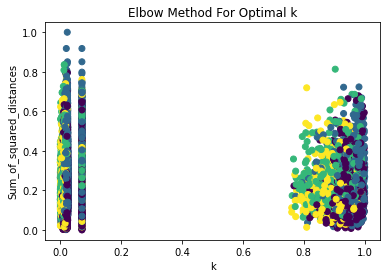

In [1]:
# 02. K-Means Clustering #############################################
# Requirements: numerical and normalized features

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML

df=pd.read_csv('/Users/narendravenkatesan/Downloads/Loans.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# replace missing values in numerical variables by using mean value #################################
df["Monthly Debt"].fillna(df["Monthly Debt"].mean(), inplace=True)
df["Annual Income"].fillna(df["Annual Income"].mean(), inplace=True)
df["Credit Score"].fillna(df["Credit Score"].mean(), inplace=True)
df["Years of Credit History"].fillna(df["Years of Credit History"].mean(), inplace=True)
df["Months since last delinquent"].fillna(df["Months since last delinquent"].mean(), inplace=True)
df["Maximum Open Credit"].fillna(df["Maximum Open Credit"].mean(), inplace=True)
df["Bankruptcies"].fillna(df["Bankruptcies"].mean(), inplace=True)
df["Tax Liens"].fillna(df["Tax Liens"].mean(), inplace=True)

# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
    
# remove column ID
df=df.drop('Years in current job',1)
df=df.drop('Loan Status',1)
df=df.drop('Purpose',1)

# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# Data preprocessing
# Data preprocessing ################################################################################
print('Column Datatypes:\n',df.dtypes)
# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_knn[['Home Ownership','Term']])
# add them to dataframe
df_knn=df_knn.join(df_dummies)
# drop original columns
df_knn=df_knn.drop('Term',axis=1)
df_knn=df_knn.drop('Home Ownership', axis=1)

display('Data Example:',HTML(df_knn.head(10).to_html()))

# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_knn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)  

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())
    
    # We ignore the label column
df_kmeans=df_knn.drop('Monthly Debt',axis=1)
display(HTML(df_kmeans.head(10).to_html()))

# KMeans clustering ####################################################################
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# API, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans=KMeans(n_clusters=4, init = 'k-means++', random_state=1, algorithm = 'auto')
kmeans.fit(df_kmeans)
y_pred=kmeans.predict(df_kmeans)

plt.scatter(df_kmeans['Credit Score'],df_kmeans['Years of Credit History'],c=y_pred,cmap='viridis')

# get the cluster labels and add it back to the original data
opt=kmeans.labels_
df_knn['Cluster']=opt
display('Data:',HTML(df_knn.tail(10).to_html()))


# try different K value and find the best K for KMeans
# Assumption: SSE is smaller, it is better

Sum_of_squared_distances = []
K = range(1,1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_kmeans)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot K and SSE, observe which one is better
# In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


#Writing results to classification task
df_kmeans.to_csv('Kmeans_outputs.csv', sep=',')







In [2]:
# 03. DBSCAN - Density-based Clustering

from sklearn.cluster import DBSCAN

# API: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
df_dbscan=df_knn.drop(['Monthly Debt','Cluster'],axis=1)
display('Data:',HTML(df_dbscan.tail(10).to_html()))

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 2, min_samples = 4, algorithm = 'auto').fit(df_dbscan) 
labels = db_default.labels_ 
df_dbscan['Cluster']=labels
display('Data after clustering:',HTML(df_dbscan.tail(10).to_html()))

# Visualize the clusters

# Building the label to colour mapping 
# Need to figure out how many clusters were produced, then assign different number of the colors
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df_dbscan['Annual Income'], df_dbscan['Years of Credit History'], color ='r'); 
g = plt.scatter(df_dbscan['Annual Income'], df_dbscan['Years of Credit History'], color ='g'); 
b = plt.scatter(df_dbscan['Annual Income'], df_dbscan['Years of Credit History'], color ='b'); 
k = plt.scatter(df_dbscan['Annual Income'], df_dbscan['Years of Credit History'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(df_dbscan['Annual Income'], df_dbscan['Years of Credit History'], c = cvec)   
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))   
plt.show()

#Writing results to classification task
df_dbscan.to_csv('dbscan_outputs.csv', sep=',')






NameError: name 'df_knn' is not defined